# Example rat brain image registration

This example shows registration of an iDISCO cleared rat brain hemisphere being registered to the Waxholm space MRI atlas.

Please note that image data has not been released publicly, and so this example cannot currently be reproduced by a user.  However, a user can copy this notebook to find appropriate settings for their own data.

# Import libraries

Note that the emlddmm library will likely be in a different location on your system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import sys
sys.path.append('/home/dtward/data/csh_data/emlddmm')
import emlddmm
from os import makedirs
from os.path import join

# Load the data

In [6]:
atlas_name = '/home/dtward/data/waxholm/WHS_SD_rat_atlas_v2_pack/WHS_SD_rat_T2star_v1.01_crop_down2_ss.vtk'
target_name = 'calb1_cat_000_downsampled.npz'

In [7]:
# note the output directory here is named after the target image, but you can use anything
outdir = target_name.replace('.npz','_out')
makedirs(outdir,exist_ok=True)

In [8]:
xI,I,_,_ = emlddmm.read_data(atlas_name)

In [9]:
I = I / np.mean(np.abs(I))

In [10]:
# pad it
pad = 4
I = np.pad(I,((0,0),)+((pad,)*2,)*3)
for i in range(3):
    for j in range(pad):
        d = xI[i][1] - xI[i][0]
        xI[i] = np.concatenate(   (  xI[i][0,None]-d ,xI[i], xI[i][-1,None]+d) )

In [11]:
print([x[1] - x[0] for x in xI])

[78.125, 78.125, 78.125]


<IPython.core.display.Javascript object>


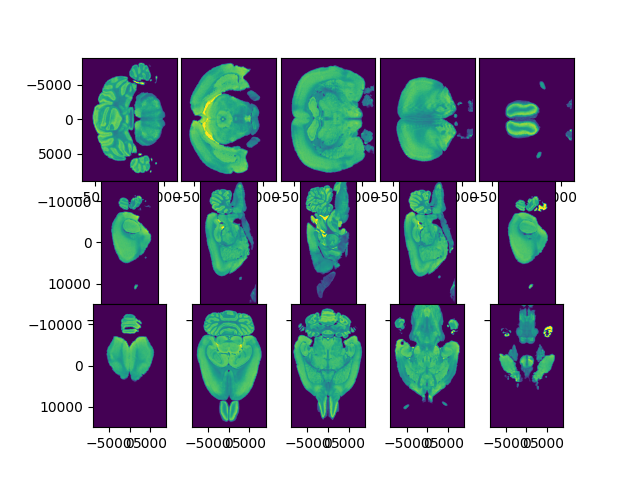

(<Figure size 640x480 with 15 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [12]:
emlddmm.draw(I,xI)

In [13]:
data = np.load(target_name,allow_pickle=True)
J = data['I'][0,None]
xJ = data['xI'].tolist()

In [14]:
J = J / np.mean(np.abs(J))

<IPython.core.display.Javascript object>


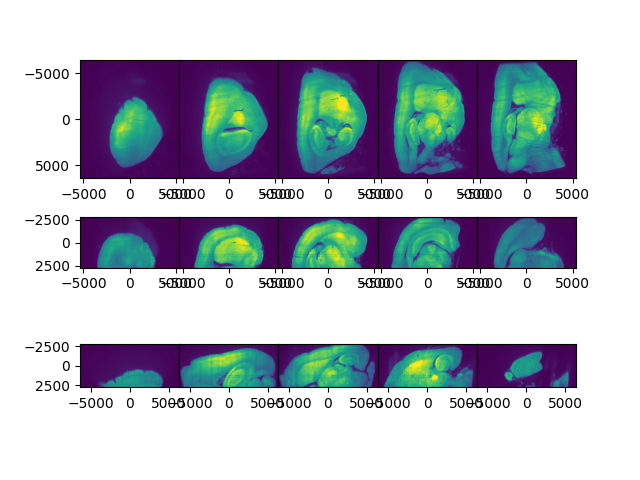

In [15]:
fig,ax = emlddmm.draw(J,xJ)

In [16]:
# print voxel sizes
[x[1] - x[0] for x in xI],[x[1] - x[0] for x in xJ]

([78.125, 78.125, 78.125], [50.0, 50.0, 50.0])

<IPython.core.display.Javascript object>


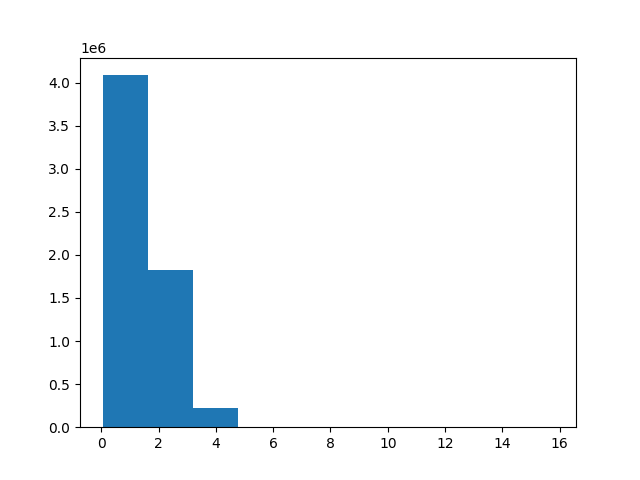

(array([4.085835e+06, 1.824080e+06, 2.278360e+05, 6.200000e+01,
        1.600000e+01, 1.400000e+01, 6.000000e+00, 3.000000e+00,
        2.000000e+00, 2.000000e+00]),
 array([ 0.04210124,  1.6163021 ,  3.1905031 ,  4.7647038 ,  6.338905  ,
         7.9131055 ,  9.487307  , 11.061507  , 12.635708  , 14.209909  ,
        15.78411   ], dtype=float32),
 <BarContainer object of 10 artists>)

In [17]:
fig,ax = plt.subplots()
ax.hist(J.ravel())

# Set up configuration for low resolution registration, and run it

In [18]:
config = {
    'device':'cpu',
    'n_iter':1000,
    'v_start':0,
    'ev':2e-3,
    'a':1000.0,
    'dv':500.0,
    'sigmaR':1e5,
    'eA':1e6,
    'local_contrast':[32,]*3,
    'sigmaM':0.5,
    'sigmaB':1.0,
    'sigmaA':2.5,
    'muB':np.min(J),
    'muA':np.quantile(J,0.999)
}

In [19]:
# initial Affine is important
L = emlddmm.orientation_to_orientation('ARI','RPI')*0.8
T = np.array([3000.0,0.0,0.0])
A = np.block([[L,T[:,None]],[np.zeros((1,3)),np.ones((1,1))]])

<IPython.core.display.Javascript object>


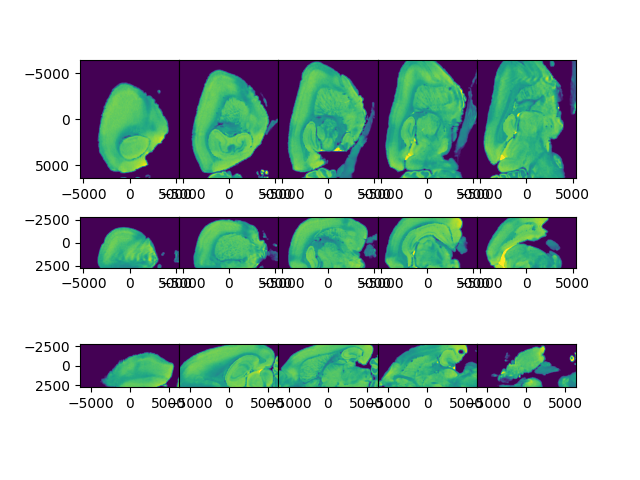

(<Figure size 640x480 with 15 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [20]:
tform = emlddmm.compose_sequence([emlddmm.Transform(A,'b')],xJ)
tmp = emlddmm.apply_transform_float(xI,I,tform)
emlddmm.draw(tmp,xJ)

<IPython.core.display.Javascript object>


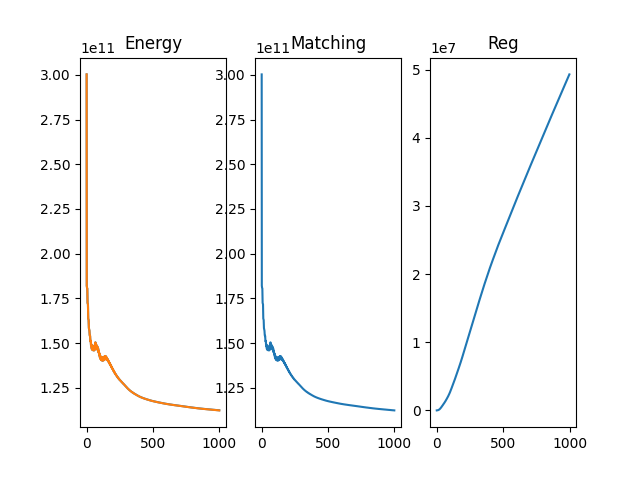

<IPython.core.display.Javascript object>


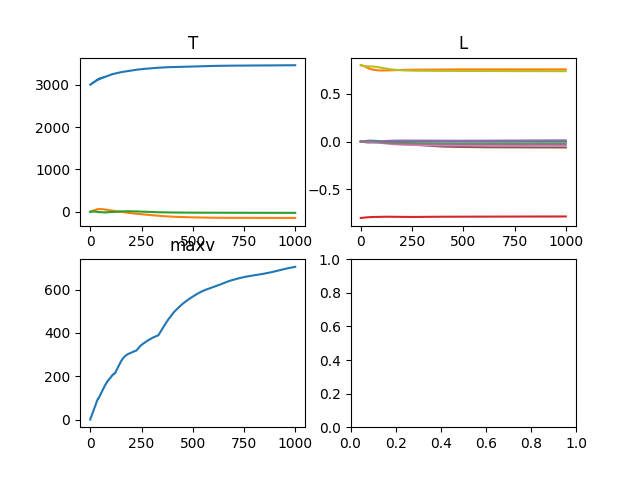

<IPython.core.display.Javascript object>


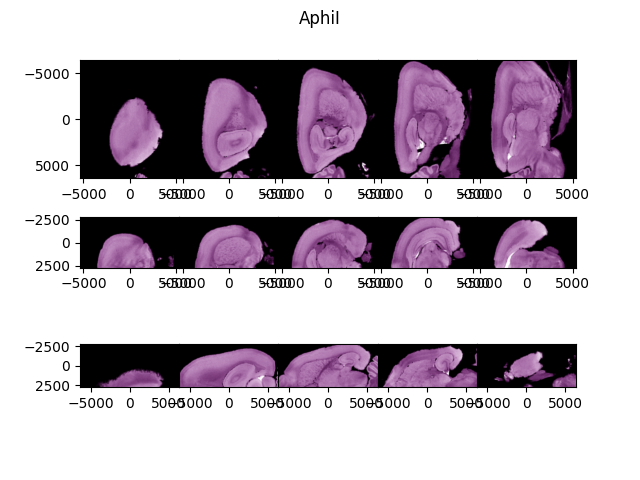

<IPython.core.display.Javascript object>


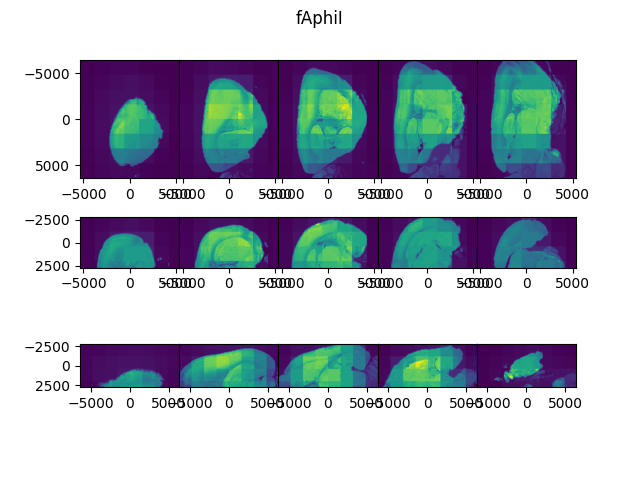

<IPython.core.display.Javascript object>


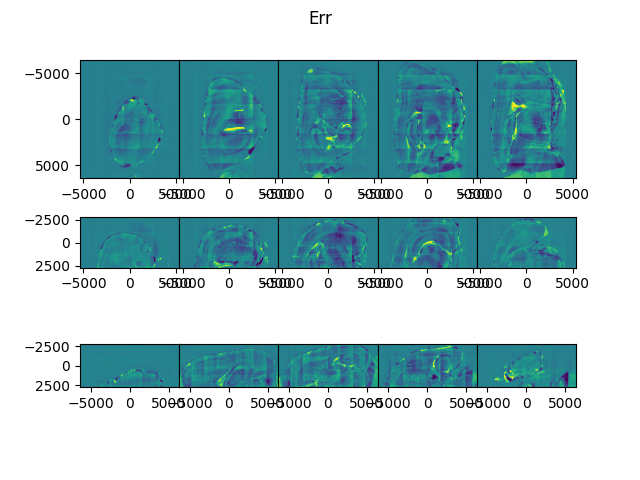

<IPython.core.display.Javascript object>


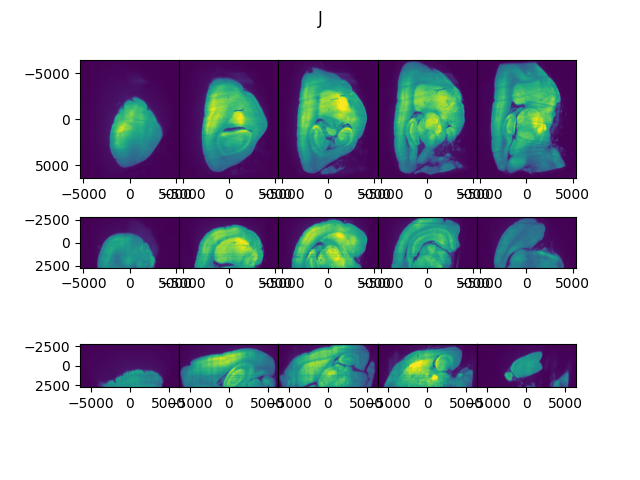

<IPython.core.display.Javascript object>


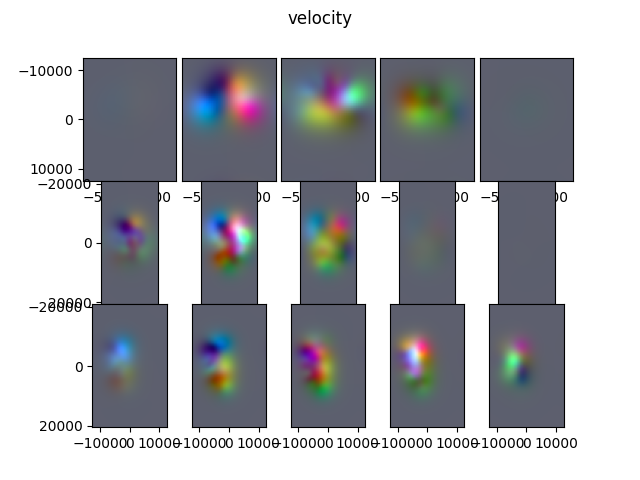

<IPython.core.display.Javascript object>


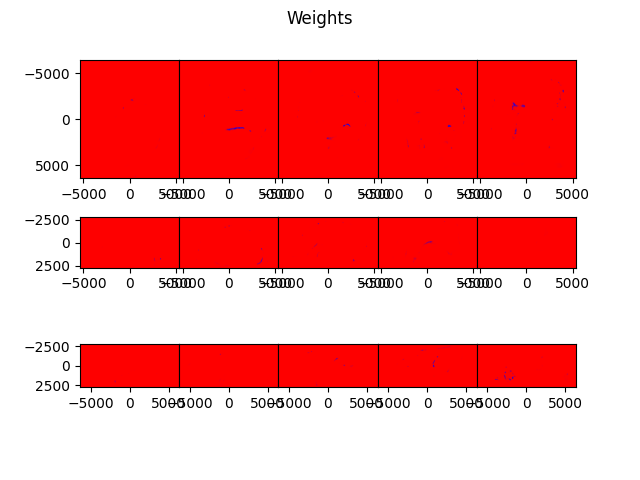

/home/dtward/data/csh_data/emlddmm/emlddmm.py:180: RuntimeWarning: invalid value encountered in true_divide
  J /= (vmax[:,None,None,None] - vmin[:,None,None,None])


Iteration 50, translation oscilating, reducing eA to 900000.0
Iteration 60, translation oscilating, reducing eA to 810000.0
Iteration 90, linear oscilating, reducing eA to 729000.0
Iteration 110, linear oscilating, reducing eA to 656100.0
Iteration 130, translation oscilating, reducing eA to 590490.0
Iteration 370, linear oscilating, reducing eA to 531441.0
Iteration 560, linear oscilating, reducing eA to 478296.9
Iteration 620, linear oscilating, reducing eA to 430467.21
Iteration 630, translation oscilating, reducing eA to 387420.489
Iteration 670, linear oscilating, reducing eA to 348678.4401
Iteration 690, linear oscilating, reducing eA to 313810.59609
Iteration 730, linear oscilating, reducing eA to 282429.536481
Iteration 740, linear oscilating, reducing eA to 254186.58283290002
Iteration 750, translation oscilating, reducing eA to 228767.92454961003
Iteration 770, linear oscilating, reducing eA to 205891.13209464905
Iteration 810, linear oscilating, reducing eA to 185302.0188851

In [21]:
out = emlddmm.emlddmm(I=np.stack((I[0],I[0]**2)),xI=xI,J=J,xJ=xJ,A=A,**config)

# Run it again using a warm start and local contrast

In [22]:
config1 = dict(config)
config1['local_contrast'] = [16]*3


/home/dtward/data/csh_data/emlddmm/emlddmm.py:1406: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(v.detach().clone(),device=device,dtype=dtype)
/home/dtward/data/csh_data/emlddmm/emlddmm.py:1450: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A.detach().clone(),device=device,dtype=dtype)


<IPython.core.display.Javascript object>


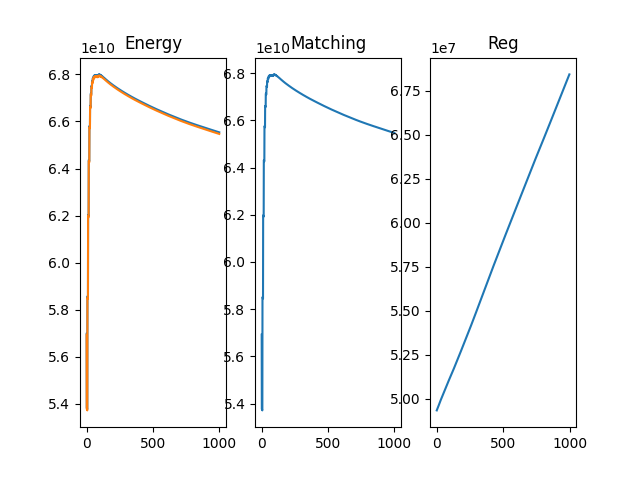

<IPython.core.display.Javascript object>


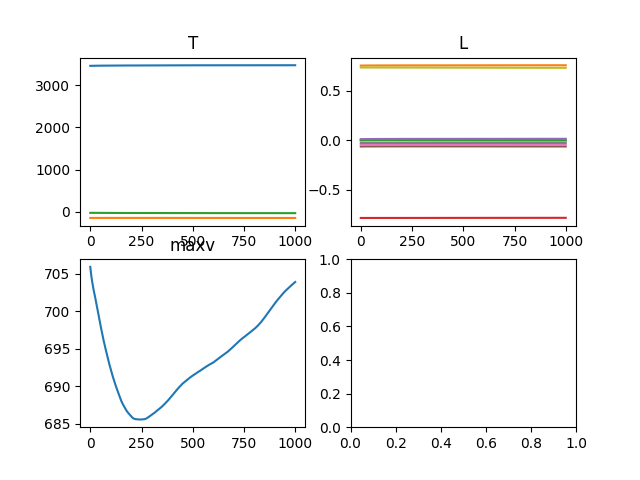

<IPython.core.display.Javascript object>


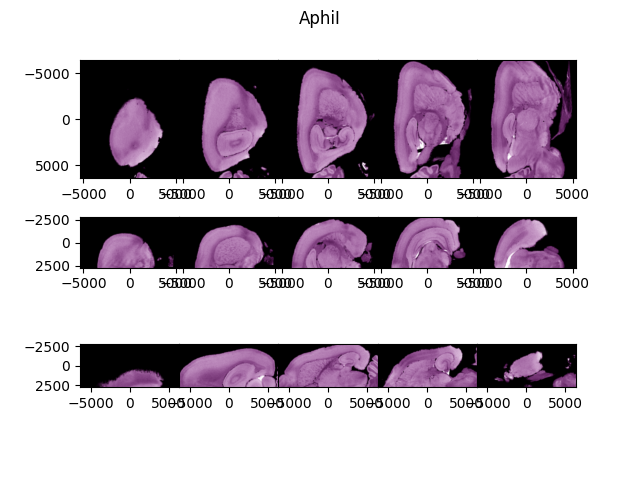

<IPython.core.display.Javascript object>


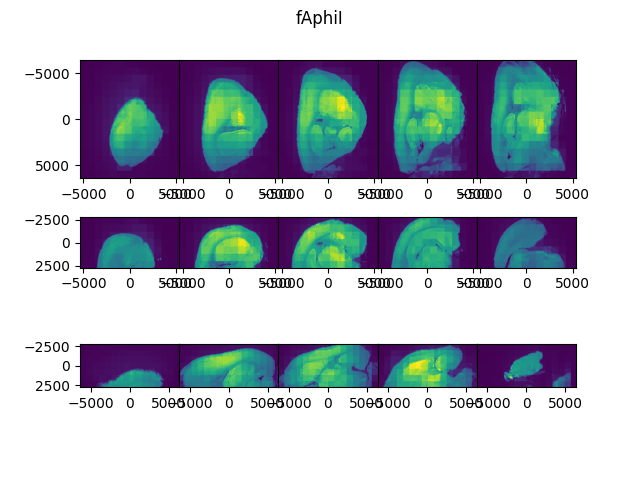

<IPython.core.display.Javascript object>


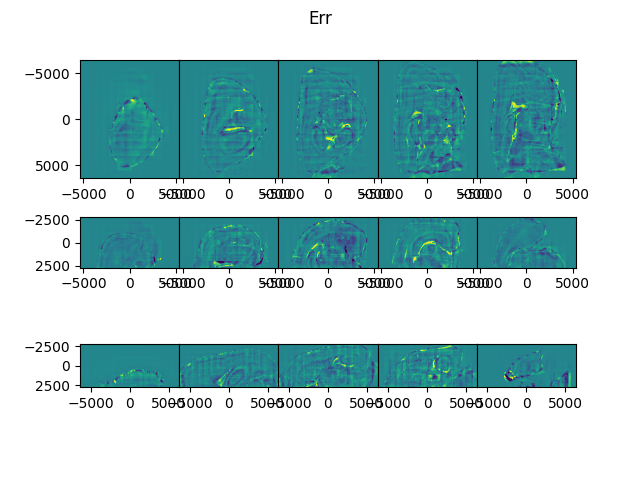

<IPython.core.display.Javascript object>


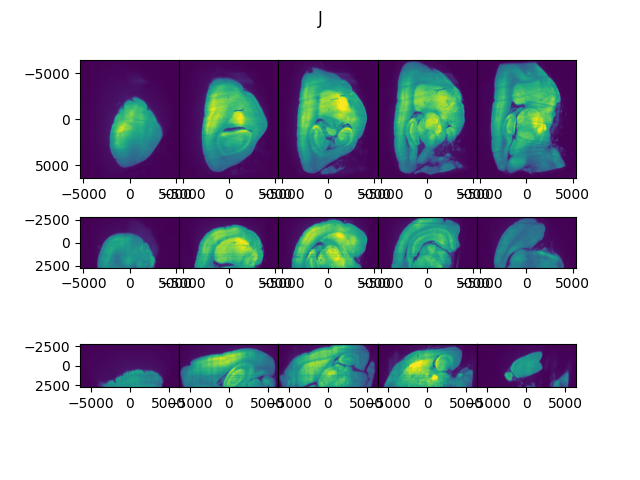

<IPython.core.display.Javascript object>


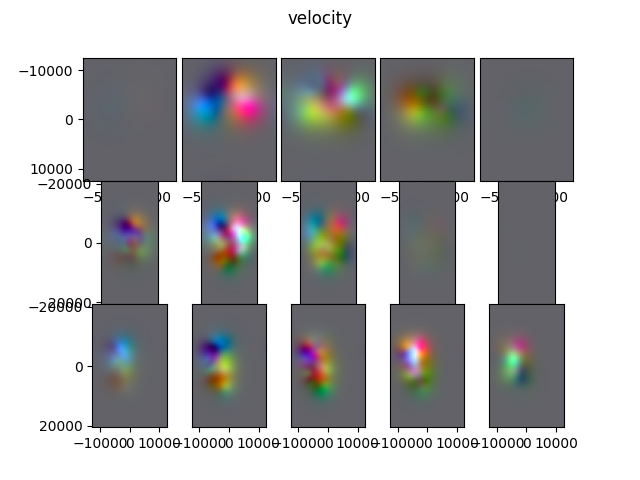

<IPython.core.display.Javascript object>


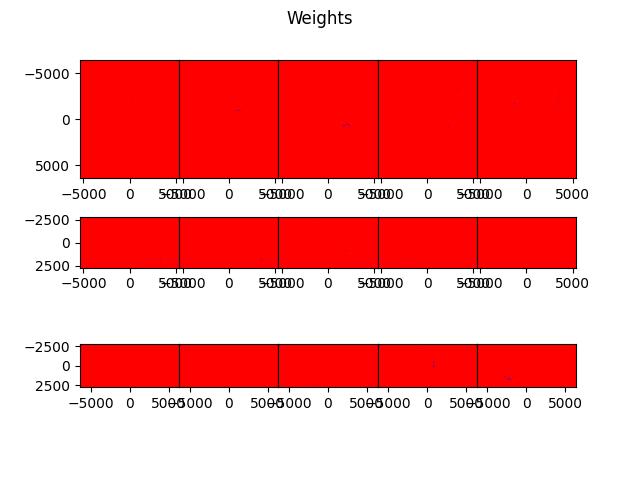

Iteration 20, translation oscilating, reducing eA to 900000.0
Iteration 70, linear oscilating, reducing eA to 810000.0
Iteration 190, translation oscilating, reducing eA to 729000.0
Iteration 230, translation oscilating, reducing eA to 656100.0
Iteration 270, translation oscilating, reducing eA to 590490.0
Iteration 280, translation oscilating, reducing eA to 531441.0
Iteration 310, translation oscilating, reducing eA to 478296.9
Iteration 360, translation oscilating, reducing eA to 430467.21
Iteration 480, translation oscilating, reducing eA to 387420.489
Iteration 490, translation oscilating, reducing eA to 348678.4401
Iteration 510, translation oscilating, reducing eA to 313810.59609
Iteration 550, translation oscilating, reducing eA to 282429.536481
Iteration 720, translation oscilating, reducing eA to 254186.58283290002
Iteration 750, translation oscilating, reducing eA to 228767.92454961003
Iteration 760, linear oscilating, reducing eA to 205891.13209464905
Iteration 850, transla

In [24]:
out1 = emlddmm.emlddmm(I=np.stack((I[0],I[0]**2)),xI=xI,J=J,xJ=xJ,A=out['A'],v=out['v'],**config1)

# Make some visualizations of the result to verify accuracy

In [25]:
# accuracy in target space
tform = emlddmm.compose_sequence([emlddmm.Transform(out1['A'],'b'),emlddmm.Transform(out1['v'],'b',domain=out1['xv'])],xJ)
AphiI = emlddmm.apply_transform_float(xI,I,tform)

In [26]:
figsize = (9,5)

/home/dtward/.local/intelpython3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


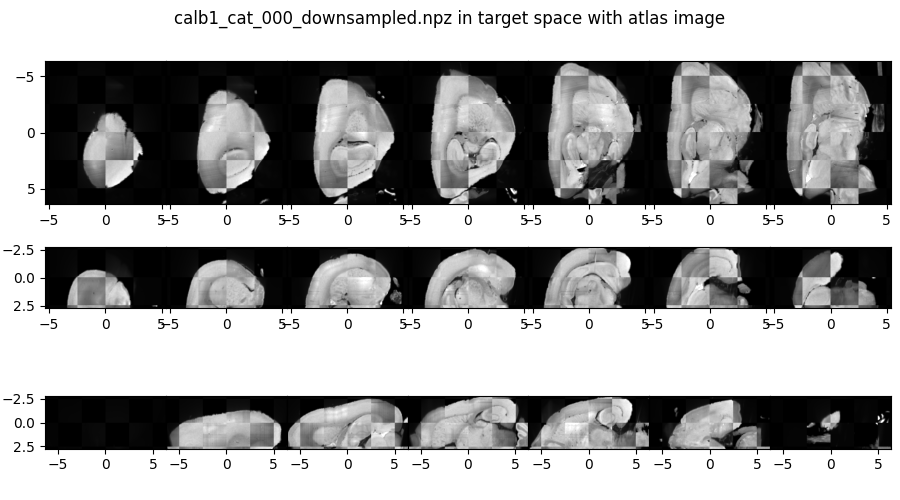

In [27]:

# let's make a grid
dgrid = 5000.0
grid = [((x%dgrid) > dgrid/2)*2-1 for x in xJ]
GRID = (grid[0][:,None,None]*grid[1][None,:,None]*grid[2][None,None,:])*0.5+0.5
fig = plt.figure(figsize=figsize)
fig,ax = emlddmm.draw(GRID*J/np.quantile(J.ravel(),0.99) + (1-GRID)*AphiI.numpy()/np.quantile(I.ravel(),0.99),[x/1000 for x in xJ],cmap='gray', n_slices=7, fig=fig)
fig.suptitle(f'{target_name} in target space with atlas image')
fig.subplots_adjust(left=0.05,right=0.99,bottom=0.01,wspace=0,hspace=0)
fig.savefig(join(outdir,'target_space_image.png'))

In [28]:
# accuracy in atlas space
tformi = emlddmm.compose_sequence([emlddmm.Transform(out1['v'],'f',domain=out1['xv']),emlddmm.Transform(out1['A'],'f')],xI)
phiiAiJ = emlddmm.apply_transform_float(xJ,J,tformi,padding_mode='zeros')

<IPython.core.display.Javascript object>


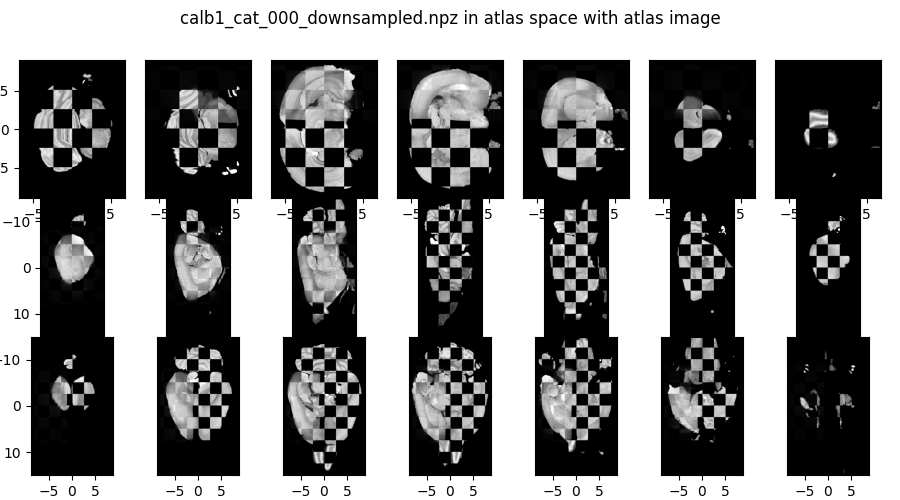

In [29]:
# 
grid = [((x%dgrid) > dgrid/2)*2-1 for x in xI]
GRID = (grid[0][:,None,None]*grid[1][None,:,None]*grid[2][None,None,:])*0.5+0.5
fig,ax = plt.subplots(figsize=figsize)
fig,ax = emlddmm.draw(GRID*phiiAiJ.numpy()/np.quantile(J.ravel(),0.99) + (1-GRID)*I/np.quantile(I.ravel(),0.99),[x/1000 for x in xI],cmap='gray',n_slices=7,fig=fig)
fig.suptitle(f'{target_name} in atlas space with atlas image')
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.05,wspace=0,hspace=0)
fig.savefig(join(outdir,'atlas_space_image.png'))

<IPython.core.display.Javascript object>


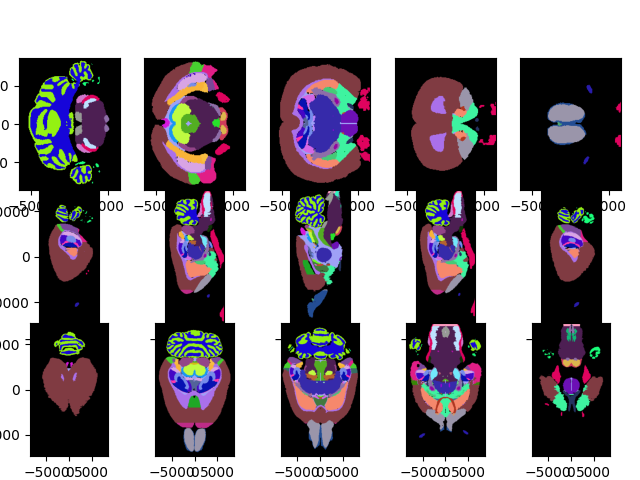

In [30]:
# now labels
seg_name = '/home/dtward/data/waxholm/WHS_SD_rat_atlas_v2_pack/WHS_SD_rat_atlas_v2_crop_down2.vtk'
xS,S,_,_ = emlddmm.read_data(seg_name)
SRGB = emlddmm.labels_to_rgb(S)
fig,ax = emlddmm.draw(SRGB,xS)
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.05,wspace=0,hspace=0)

In [31]:
AphiS = emlddmm.apply_transform_int(xS,S,tform)

In [32]:
AphiSRGB = emlddmm.labels_to_rgb(AphiS)

<IPython.core.display.Javascript object>


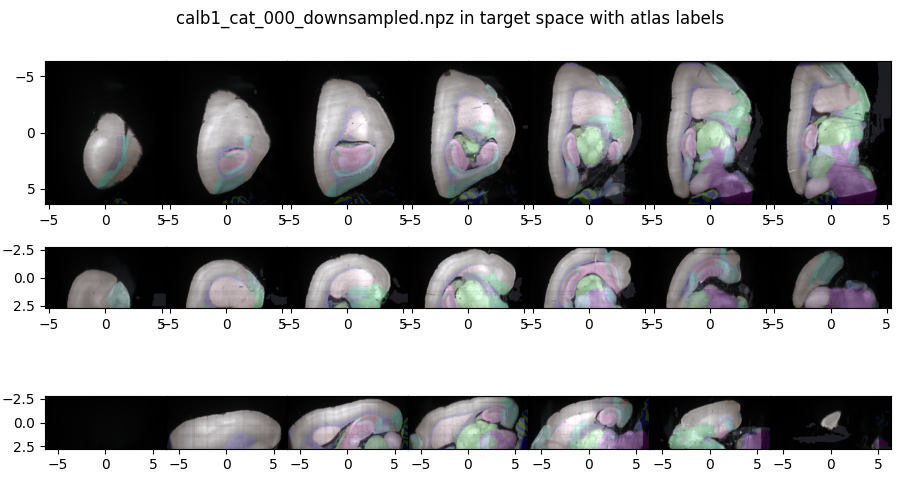

In [33]:
alpha = 0.2
fig = plt.figure(figsize=figsize)
emlddmm.draw(AphiSRGB*alpha + J/np.quantile(J,0.99)*(1-alpha),[x/1000 for x in xJ], n_slices=7,fig=fig)
fig.suptitle(f'{target_name} in target space with atlas labels')
fig.subplots_adjust(left=0.05,right=0.99,bottom=0.01,wspace=0,hspace=0)
fig.savefig(join(outdir,'target_space_labels.png'))

In [34]:
IdS = emlddmm.apply_transform_int(xS,S,emlddmm.compose_sequence([emlddmm.Transform(np.eye(4))],xI))
IdSRGB = emlddmm.labels_to_rgb(IdS)

<IPython.core.display.Javascript object>


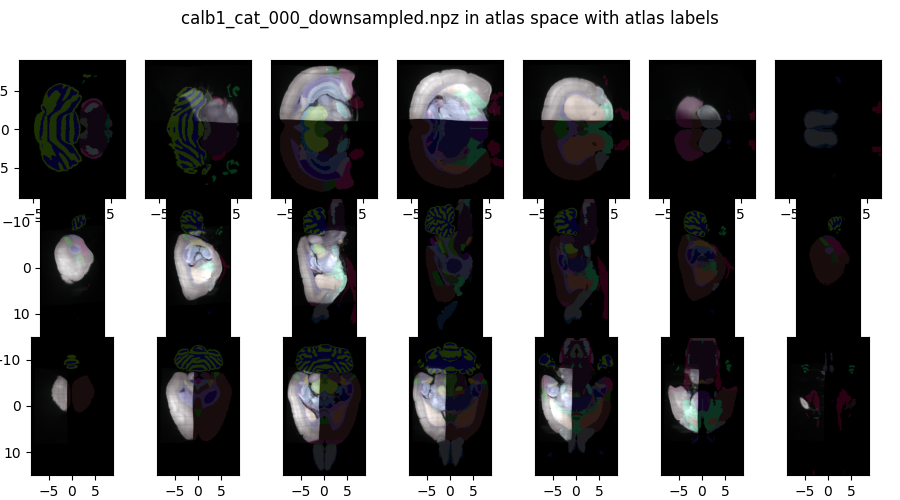

In [35]:
fig = plt.figure(figsize=figsize)
emlddmm.draw(IdSRGB*alpha + phiiAiJ.numpy()/np.quantile(J,0.99)*(1-alpha),[x/1000 for x in xI],fig=fig,n_slices=7)
fig.subplots_adjust(left=0.01,right=0.99,bottom=0.05,wspace=0,hspace=0)
fig.suptitle(f'{target_name} in atlas space with atlas labels')
fig.savefig(join(outdir,'atlas_space_labels.png'))

# save the registration data

In [36]:
# the registration data
np.save(join(outdir,'out.npy'),out1)

In [37]:
1

1